In [ ]:
import pandas as pd
import missingno as msno

In [ ]:
pd.set_option('display.max_columns', 30)

# Overview

The "flights.csv" dataset contains information about the flights of an airport. This dataset includes information such as departure and arrival time, delays, flight company, flight number, flight origin and destination, flight duration, distance, hour and minute of flight, and exact date and time of flight. This data cannot be used in management analysis and strategies and provide useful information about the performance of flights and placement companies. The analysis of the data in this dataset can be used as a basis for the following activities:
1. Analysis of time patterns and trends: by examining the departure and arrival time of the aircraft, changes and time changes, patterns and trends in flight behavior can be identified.
2. Analysis of American companies: By viewing information about airlines such as the number of flights, the impact and overall performance, you can compare and analyze the performance of each company.
3. Analysis of delays and service quality: By examining delays and arrival time, I can collect and analyze information about the quality of services provided by the airport and companies.
4. Analysis of flight routes: by checking the origin and destination of flights, distances and flight duration, popular routes and people's choices can be identified and analyzed.
5. Analysis of airport performance: by observing the characteristics of flights and airport performance, it is possible to identify and analyze the strengths and weaknesses of the airport and suggest improvements. It provides various tools for data analysis and visualization and can be used as a basis for managerial decisions in the field of aviation industry.

Data dictionary:
- **id**: A unique identifier for each flight record in the dataset.
- **year**: The year in which the flight took place (2013 in this dataset).
- **month**: The month in which the flight took place (1 to 12).
- **day**: The day of the month on which the flight took place (1 to 31).
- **dep_time**: The actual local departure time of the flight, in 24-hour format (hhmm).
- **sched_dep_time**: The scheduled local departure time of the flight, in 24-hour format (hhmm).
- **dep_delay**: The difference between the actual and scheduled departure times of the flight, in minutes. A positive value indicates - a delayed departure, while a negative value indicates an early departure.
- **arr_tim**e: The actual local arrival time of the flight, in 24-hour format (hhmm).
- **sched_arr_time**: The scheduled local arrival time of the flight, in 24-hour format (hhmm).
- **arr_delay**: The difference between the actual and scheduled arrival times of the flight, in minutes. A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
- **carrier**: The two-letter code of the airline carrier for the flight.
- **flight**: The flight number of the flight.
- **tailnum**: The unique identifier of the aircraft used for the flight.
- **origin**: The three-letter code of the airport of origin for the flight.
- **dest**: The three-letter code of the destination airport for the flight.
- **air_time**: The duration of the flight, in minutes.**
- **distance**: The distance between the origin and destination airports, in miles.
- **hour**: The hour component of the scheduled departure time, in local time.
- **minute**: The minute component of the scheduled departure time, in local time.
- **time_hour**: The scheduled departure time of the flight, in local time and format (yyyy-mm-dd hh:mm:ss).
- **name**: The name of the airline carrier for the flight.


مجموعهی دادهی ضمیمه شده، مجموعهی دادهی پروازهای یک فرودگاه را
نمایش میدهد. با استفاده از تکنیکهای مقدماتی پیشپردازش دادهها، تمامی
ستونهای این مجموعهی داده را به فرمت قابل استفاده توسط الگورتمهای
یادگیری ماشین تبدیل کنید

In [ ]:
df = pd.read_csv("flights.csv")

In [ ]:
df.head(3)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.


In [ ]:
#df[df.arr_delay.isna()]
#df["arr_delay"] = df.arr_delay.fillna(df.arr_time - df.sched_arr_time)

In [ ]:
df.tail(3)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [1]:
miss_val_df = pd.DataFrame(df.isna().sum() / df.shape[0], columns=["pct_missing"])
miss_val_df['number_of_missing'] = df.isna().sum()

miss_val_df.style.background_gradient()

NameError: ignored

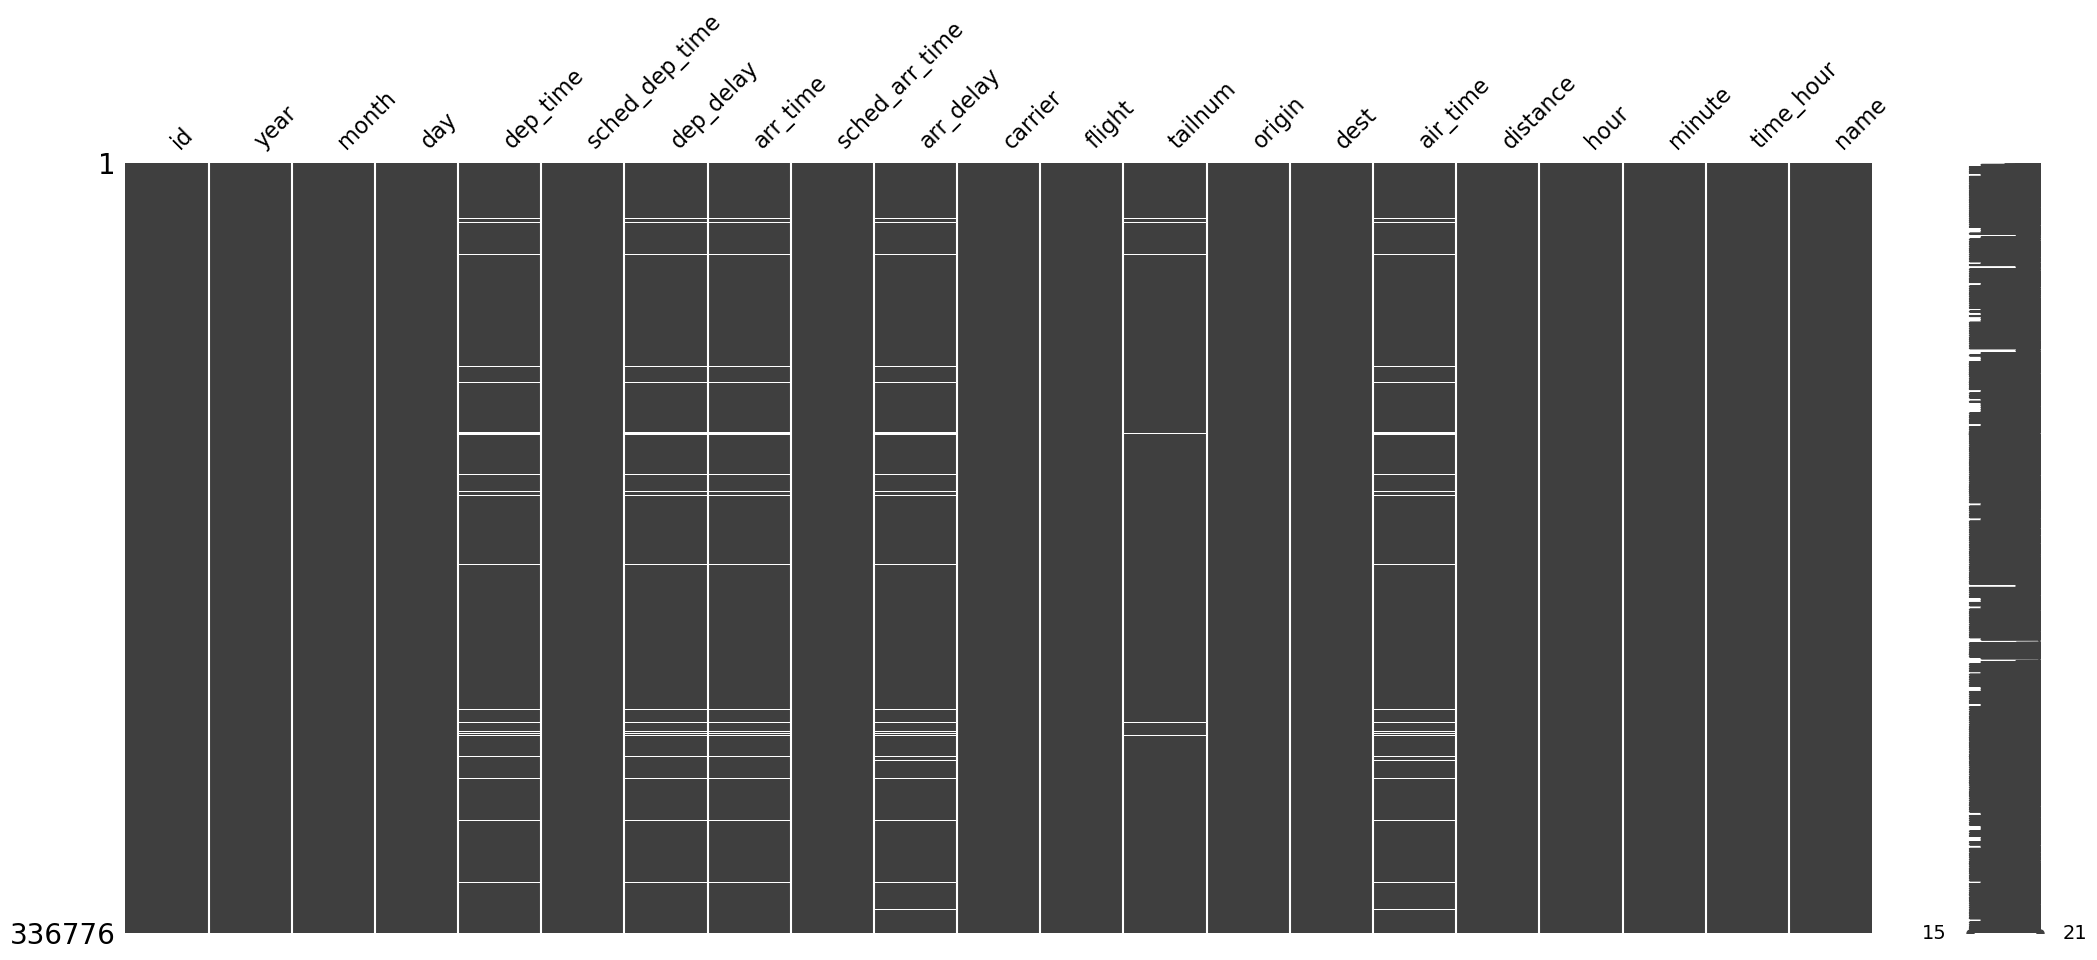

In [ ]:
msno.matrix(df);

### Handle Missing Values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df[df.duplicated()].shape[0]

0

In [ ]:
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,JetBlue Airways
327342,336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,JetBlue Airways
327343,336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,JetBlue Airways
327344,336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,JetBlue Airways


In [ ]:
df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,327346.000000,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,168190.637793,2013.0,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314,13.141010,26.234116
std,97510.314383,0.0,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523,4.662063,19.295918
min,0.000000,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,83007.250000,2013.0,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000
50%,168251.500000,2013.0,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000,13.000000,29.000000
75%,252782.750000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,44.000000
max,336769.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show()

In [ ]:
df.select_dtypes(include="number")

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,1545,227.0,1400,5,15
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,1714,227.0,1416,5,29
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,1141,160.0,1089,5,40
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,725,183.0,1576,5,45
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,461,116.0,762,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,1816,41.0,209,22,45
327342,336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,2002,52.0,301,22,50
327343,336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,486,47.0,264,22,46
327344,336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,718,33.0,187,22,55


In [ ]:
selected_col_hist = ['dep_time',
                     'sched_dep_time',
                     'dep_delay',
                     'arr_time',
                     'sched_arr_time',
                     'arr_delay',
                     'flight',
                     'air_time',
                     'distance']

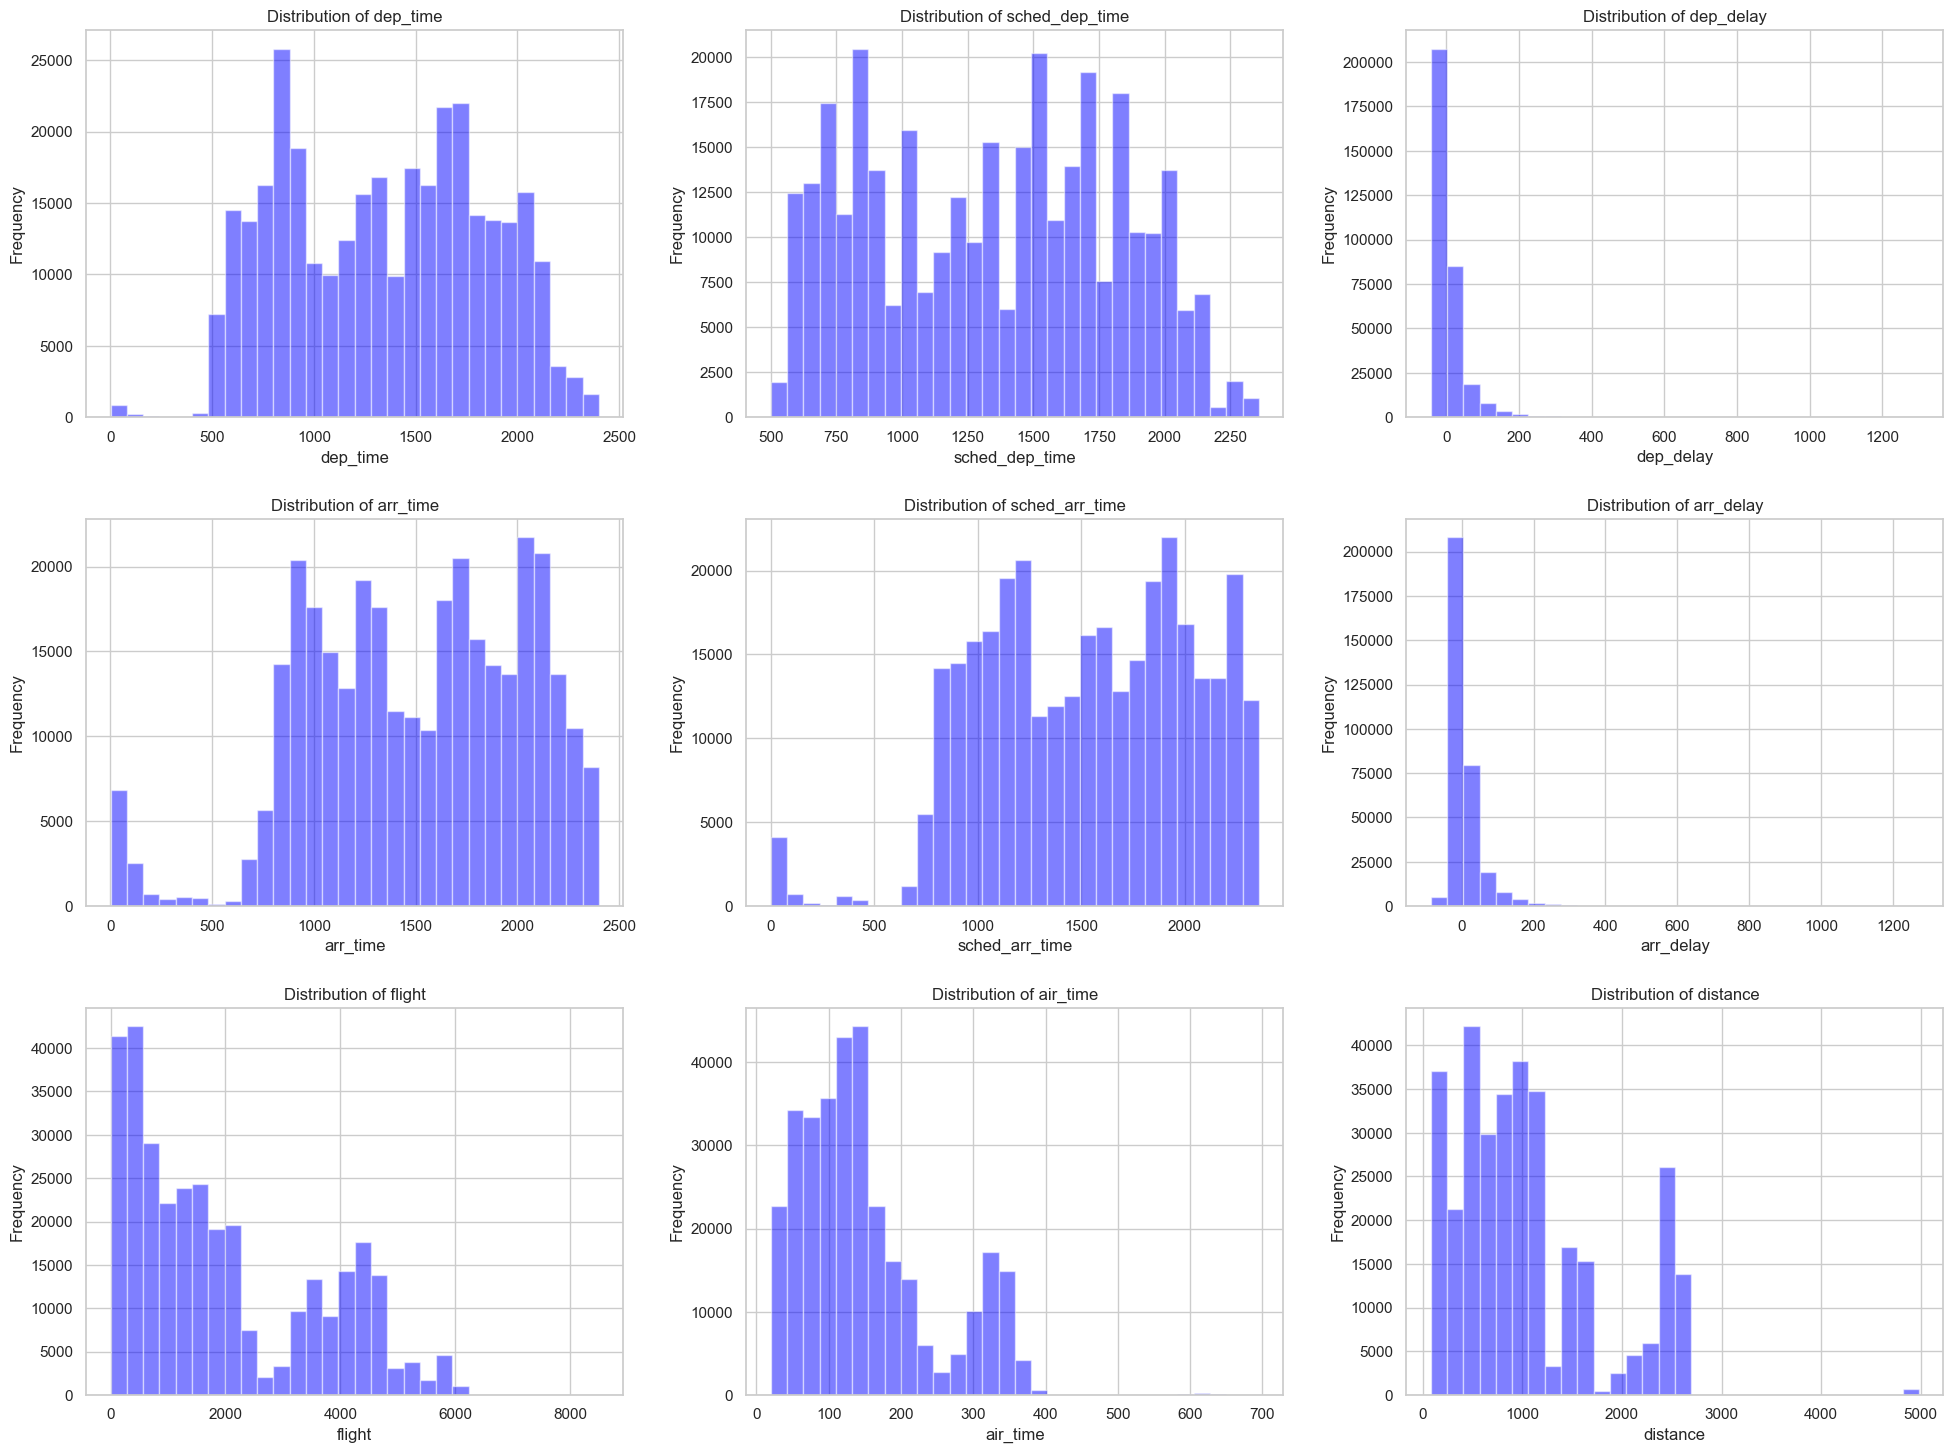

In [ ]:
plot_distributions(df[selected_col_hist])

### Non Numerical Features

In [ ]:
df.select_dtypes(exclude='number')

,carrier,tailnum,origin,dest,time_hour,name
0,UA,N14228,EWR,IAH,2013-01-01 05:00:00,United Air Lines Inc.
1,UA,N24211,LGA,IAH,2013-01-01 05:00:00,United Air Lines Inc.
2,AA,N619AA,JFK,MIA,2013-01-01 05:00:00,American Airlines Inc.
3,B6,N804JB,JFK,BQN,2013-01-01 05:00:00,JetBlue Airways
4,DL,N668DN,LGA,ATL,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...
327341,B6,N354JB,JFK,SYR,2013-09-30 22:00:00,JetBlue Airways
327342,B6,N281JB,JFK,BUF,2013-09-30 22:00:00,JetBlue Airways
327343,B6,N346JB,JFK,ROC,2013-09-30 22:00:00,JetBlue Airways
327344,B6,N565JB,JFK,BOS,2013-09-30 22:00:00,JetBlue Airways


In [ ]:
df.select_dtypes(exclude='number').nunique()

carrier        16
tailnum      4037
origin          3
dest          104
time_hour    6922
name           16
dtype: int64

In [ ]:
df.nunique()

id                327346
year                   1
month                 12
day                   31
dep_time            1317
sched_dep_time      1020
dep_delay            526
arr_time            1410
sched_arr_time      1162
arr_delay            577
carrier               16
flight              3835
tailnum             4037
origin                 3
dest                 104
air_time             509
distance             213
hour                  19
minute                60
time_hour           6922
name                  16
dtype: int64

In [ ]:
df.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [ ]:
cat_name_list = ["carrier", "origin", "dest"]
num_name_list =  list(set(df.select_dtypes(include="number").columns) - {"id", "year"})
selected_col = list(set(cat_name_list + num_name_list))

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le = LabelEncoder()
df['carrier'] = le.fit_transform(df['carrier'])

In [ ]:
le = LabelEncoder()
df['origin'] = le.fit_transform(df['origin'])

In [ ]:
le = LabelEncoder()
df['dest'] = le.fit_transform(df['dest'])

In [ ]:
df[selected_col]

,dep_delay,minute,dest,distance,arr_delay,air_time,hour,flight,origin,carrier,arr_time,month,sched_arr_time,sched_dep_time,day,dep_time
0,2.0,15,43,1400,11.0,227.0,5,1545,0,11,830.0,1,819,515,1,517.0
1,4.0,29,43,1416,20.0,227.0,5,1714,2,11,850.0,1,830,529,1,533.0
2,2.0,40,57,1089,33.0,160.0,5,1141,1,1,923.0,1,850,540,1,542.0
3,-1.0,45,12,1576,-18.0,183.0,5,725,1,3,1004.0,1,1022,545,1,544.0
4,-6.0,0,4,762,-25.0,116.0,6,461,2,4,812.0,1,837,600,1,554.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,-5.0,45,98,209,-17.0,41.0,22,1816,1,3,2334.0,9,2351,2245,30,2240.0
327342,-10.0,50,14,301,-20.0,52.0,22,2002,1,3,2347.0,9,7,2250,30,2240.0
327343,-5.0,46,81,264,-16.0,47.0,22,486,1,3,2345.0,9,1,2246,30,2241.0
327344,12.0,55,11,187,1.0,33.0,22,718,1,3,2359.0,9,2358,2255,30,2307.0


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(df[selected_col])

In [ ]:
X.shape

(327346, 16)

In [ ]:
pd.DataFrame(X, columns=df[selected_col].columns)

,dep_delay,minute,dest,distance,arr_delay,air_time,hour,flight,origin,carrier,arr_time,month,sched_arr_time,sched_dep_time,day,dep_time
0,-0.263447,-0.582203,-0.204374,0.477816,0.091963,0.814548,-1.746227,-0.245513,-1.166923,1.171765,-1.260881,-1.630263,-1.433372,-1.765753,-1.679414,-1.703373
1,-0.213529,0.143341,-0.204374,0.499558,0.293607,0.814548,-1.746227,-0.141290,1.286756,1.171765,-1.223350,-1.630263,-1.411283,-1.735801,-1.679414,-1.670608
2,-0.263447,0.713410,0.300709,0.055209,0.584870,0.099410,-1.746227,-0.494662,0.059917,-1.244297,-1.086360,-1.630263,-1.371121,-1.712267,-1.679414,-1.652177
3,-0.338324,0.972533,-1.322772,0.716977,-0.557777,0.344905,-1.746227,-0.751211,0.059917,-0.761085,-0.934358,-1.630263,-1.025724,-1.701570,-1.679414,-1.648081
4,-0.463119,-1.359570,-1.611391,-0.389140,-0.714611,-0.370233,-1.531730,-0.914021,1.286756,-0.519479,-1.294659,-1.630263,-1.397226,-1.583901,-1.679414,-1.627603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,-0.438160,0.972533,1.779880,-1.140594,-0.535372,-1.170761,1.900233,-0.078386,0.059917,-0.761085,1.561476,0.713415,1.643067,1.935475,1.624540,1.825056
327342,-0.562955,1.231655,-1.250618,-1.015578,-0.602586,-1.053350,1.900233,0.036321,0.059917,-0.761085,1.585872,0.713415,-3.063965,1.946172,1.624540,1.825056
327343,-0.438160,1.024357,1.166565,-1.065856,-0.512967,-1.106719,1.900233,-0.898603,0.059917,-0.761085,1.582118,0.713415,-3.076014,1.937614,1.624540,1.827104
327344,-0.013856,1.490778,-1.358850,-1.170489,-0.132085,-1.256151,1.900233,-0.755528,0.059917,-0.761085,1.608390,0.713415,1.657123,1.956869,1.624540,1.962262


In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer